In [1]:
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as sp

In [3]:
t=np.loadtxt('resultados.dat')

In [4]:
c=t[:,13]
ur=t[:,14]
fdev=t[:,18]

LinregressResult(slope=0.8376474306278393, intercept=2.161909130584917, rvalue=0.7991373047917281, pvalue=0.0, stderr=0.002961172098876292)


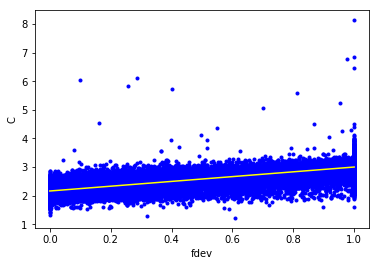

In [18]:
plt.plot(fdev,c,linestyle='none',marker='.',color='blue')
plt.xlabel('fdev')
plt.ylabel('C')
ajuste=sp.linregress(fdev,c)
print ajuste
y=[ajuste[1],ajuste[1]+ajuste[0]]
x=[0,1]
plt.plot(x,y,color='yellow')

In [37]:
cut_value=[]
for i in np.arange(0,1.1,.1):
    cut = ajuste[0]+i*ajuste[1]
    cut_value.append(cut)

(0.4, 3)

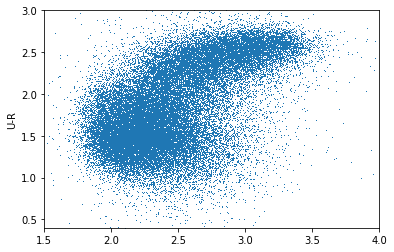

In [99]:
plt.plot(c,ur,linestyle='none',marker=',')
plt.ylabel('U-R')
plt.xlim(1.5,4)
plt.ylim(0.4,3)


In [115]:
cut_value=[]
error_late=[]
for i in np.arange(0,4,.1): #me paseo por todos los U-R entre 0 y 3
    ur_cut=i
    num=0
    num_late=0
    for j in range(len(c)):
        if (ur[j]<=ur_cut):
            num=num + 1
            if (fdev[j] < .5):
                num_late = num_late + 1
    error_late.append(1.-float(num_late)/float(num))
       

In [116]:
error_early=[]
for i in np.arange(0,4,.1): #me paseo por todos los U-R entre 0 y 3
    ur_cut=i
    num=0
    num_early=0
    for j in range(len(c)):
        if (ur[j]>=ur_cut):
            num=num + 1
            if (fdev[j] > .5):
                num_early = num_early + 1
    error_early.append(1.-float(num_early)/float(num))

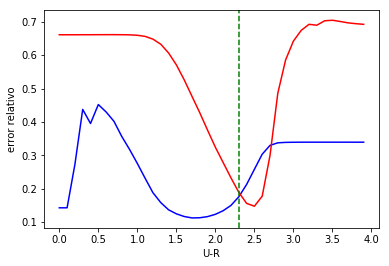

In [117]:
plt.plot(np.arange(0,4,.1),error_late,color='blue')   #falso positivo
plt.ylabel('error relativo')
plt.xlabel('U-R')
plt.plot(np.arange(0,4,.1),error_early,color='red')
plt.axvline(2.3,color='green',linestyle='--')

In [120]:
cut_value=[]
error_late_c=[]
for i in np.arange(0,4,.1): #me paseo por todos los U-R entre 0 y 3
    ur_cut=i
    num=0
    num_late=0
    for j in range(len(c)):
        if (ur[j]<=ur_cut):
            num=num + 1
            if (c[j] < 2.86):
                num_late = num_late + 1
    error_late_c.append(1.-float(num_late)/float(num))
    
error_early_c=[]
for i in np.arange(0,4,.1): #me paseo por todos los U-R entre 0 y 3
    ur_cut=i
    num=0
    num_early=0
    for j in range(len(c)):
        if (ur[j]>=ur_cut):
            num=num + 1
            if (c[j] > 2.86):
                num_early = num_early + 1
    error_early_c.append(1.-float(num_early)/float(num))

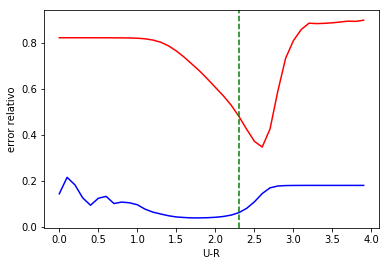

In [121]:
plt.plot(np.arange(0,4,.1),error_late_c,color='blue')   #falso positivo
plt.ylabel('error relativo')
plt.xlabel('U-R')
plt.plot(np.arange(0,4,.1),np.array(error_early_c),color='red')
plt.axvline(2.3,color='green',linestyle='--')

Text(0.5,0,'U-R')

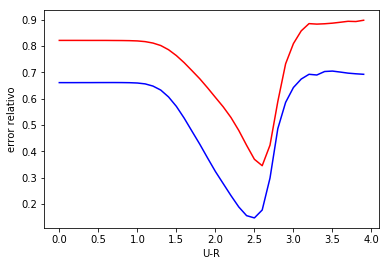

In [92]:
plt.plot(np.arange(0,4,.1),error_late_c,color='red')   #falso positivo
plt.plot(np.arange(0,4,.1),error_late,color='blue')
plt.ylabel('error relativo')
plt.xlabel('U-R')